In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Select two SMA
sma_span = 50
ema_span = 14
data = yf.download('AAPL', start='2020-01-01', end='2021-09-01')
data.index = pd.to_datetime(data.index)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,72.443558,100805600
2020-01-02,74.059998,75.150002,73.797501,75.087502,74.096458,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.376099,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.960762,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.612923,108872000


In [2]:
df = data.copy()
df[f'sma{sma_span}'] = df['Adj Close'].rolling(sma_span).mean()
df[f'ema{ema_span}'] = df['Adj Close'].ewm(span=ema_span).mean()
df.round(3).head()

,Open,High,Low,Close,Adj Close,Volume,sma50,ema14
Date,,,,,,,,
2019-12-31,72.482,73.420,72.380,73.412,72.444,100805600,NaN,72.444
2020-01-02,74.060,75.150,73.798,75.088,74.096,135480400,NaN,73.329
2020-01-03,74.287,75.145,74.125,74.357,73.376,146322800,NaN,73.347
2020-01-06,73.448,74.990,73.188,74.950,73.961,118387200,NaN,73.535
2020-01-07,74.960,75.225,74.370,74.598,73.613,108872000,NaN,73.555


In [3]:
df.dropna(inplace=True)
df.round(3).head()

,Open,High,Low,Close,Adj Close,Volume,sma50,ema14
Date,,,,,,,,
2020-03-12,63.985,67.500,62.000,62.057,61.384,418474000,75.604,70.336
2020-03-13,66.223,69.980,63.237,69.493,68.738,370732000,75.530,70.123
2020-03-16,60.487,64.770,60.000,60.553,59.895,322423600,75.246,68.758
2020-03-17,61.877,64.402,59.600,63.215,62.529,324056000,75.029,67.927
2020-03-18,59.943,62.500,59.280,61.667,60.998,300233600,74.770,67.003


In [4]:
def plot_system1(data):
    df = data.copy()
    dates = df.index
    price = df['Adj Close']
    sma200 = df[f'sma{sma_span}']
    ema20 = df[f'ema{ema_span}']
    
    with plt.style.context('fivethirtyeight'):
        fig = plt.figure(figsize=(14,7))
        plt.plot(dates, price, linewidth=1.5, label='CPB price - Daily Adj Close')
        plt.plot(dates, sma200, linewidth=2, label='Long SMA')
        plt.plot(dates, ema20, linewidth=2, label='Short EMA')
        plt.title("A Simple Crossover System")
        plt.ylabel('Price($)')
        plt.legend()
    
    plt.show() # This is needed only if not in Jupyter

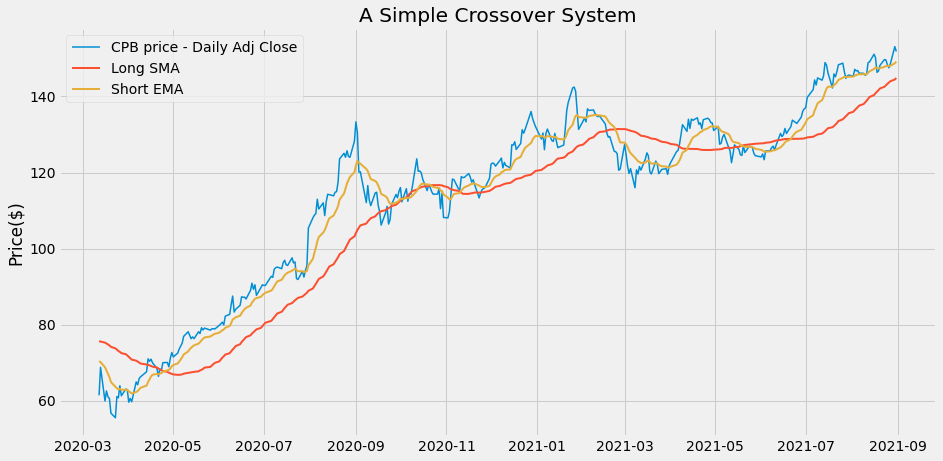

In [5]:
plot_system1(df)

In [6]:
# Our trading condition:
long_positions = np.where(df[f'ema{ema_span}'] > df[f'sma{sma_span}'], 1, 0)
df['Position'] = long_positions
df.round(3).head()

,Open,High,Low,Close,Adj Close,Volume,sma50,ema14,Position
Date,,,,,,,,,
2020-03-12,63.985,67.500,62.000,62.057,61.384,418474000,75.604,70.336,0
2020-03-13,66.223,69.980,63.237,69.493,68.738,370732000,75.530,70.123,0
2020-03-16,60.487,64.770,60.000,60.553,59.895,322423600,75.246,68.758,0
2020-03-17,61.877,64.402,59.600,63.215,62.529,324056000,75.029,67.927,0
2020-03-18,59.943,62.500,59.280,61.667,60.998,300233600,74.770,67.003,0


In [7]:
buy_signals = (df['Position'] == 1) & (df['Position'].shift(1) == 0)
df.loc[buy_signals].round(3).head()

,Open,High,Low,Close,Adj Close,Volume,sma50,ema14,Position
Date,,,,,,,,,
2020-04-27,70.45,71.135,69.988,70.793,70.024,117087600,67.561,67.922,1
2020-10-13,125.27,125.390,119.650,121.100,120.326,262330500,115.723,115.846,1
2020-11-11,117.19,119.630,116.440,119.490,118.931,112295000,114.643,115.229,1
2021-04-13,132.44,134.660,131.930,134.430,134.001,91266500,126.264,127.053,1
2021-06-22,132.13,134.080,131.620,133.980,133.780,74783600,128.865,129.429,1


In [8]:
buy_signals_prev = (df['Position'].shift(-1) == 1) & (df['Position'] == 0)
df.loc[buy_signals | buy_signals_prev].round(3).head()

,Open,High,Low,Close,Adj Close,Volume,sma50,ema14,Position
Date,,,,,,,,,
2020-04-24,69.30,70.753,69.250,70.743,69.974,126161200,67.767,67.598,0
2020-04-27,70.45,71.135,69.988,70.793,70.024,117087600,67.561,67.922,1
2020-10-12,120.06,125.180,119.280,124.400,123.605,240226800,115.478,115.157,0
2020-10-13,125.27,125.390,119.650,121.100,120.326,262330500,115.723,115.846,1
2020-11-10,115.55,117.590,114.130,115.970,115.428,138023400,114.931,114.659,0


In [9]:
def plot_system1_sig(data):
    df = data.copy()
    dates = df.index
    price = df['Adj Close']
    sma200 = df[f'sma{sma_span}']
    ema20 = df[f'ema{ema_span}']
    
    buy_signals = (df['Position'] == 1) & (df['Position'].shift(1) == 0)
    buy_marker = sma200 * buy_signals - (sma200.max()*.05)
    buy_marker = buy_marker[buy_signals]
    buy_dates = df.index[buy_signals]
    sell_signals = (df['Position'] == 0) & (df['Position'].shift(1) == 1)
    sell_marker = sma200 * sell_signals + (sma200.max()*.05)
    sell_marker = sell_marker[sell_signals]
    sell_dates = df.index[sell_signals]
    
    with plt.style.context('fivethirtyeight'):
        fig = plt.figure(figsize=(14,7))
        plt.plot(dates, price, linewidth=1.5, label='CPB price - Daily Adj Close')
        plt.plot(dates, sma200, linewidth=2, label='Long SMA')
        plt.plot(dates, ema20, linewidth=2, label='Short EMA')
        plt.scatter(buy_dates, buy_marker, marker='^', color='green', s=160, label='Buy')
        plt.scatter(sell_dates, sell_marker, marker='v', color='red', s=160, label='Sell')
        plt.title("A Simple Crossover System with Signals")
        plt.ylabel('Price($)')
        plt.legend()
        plt.show()

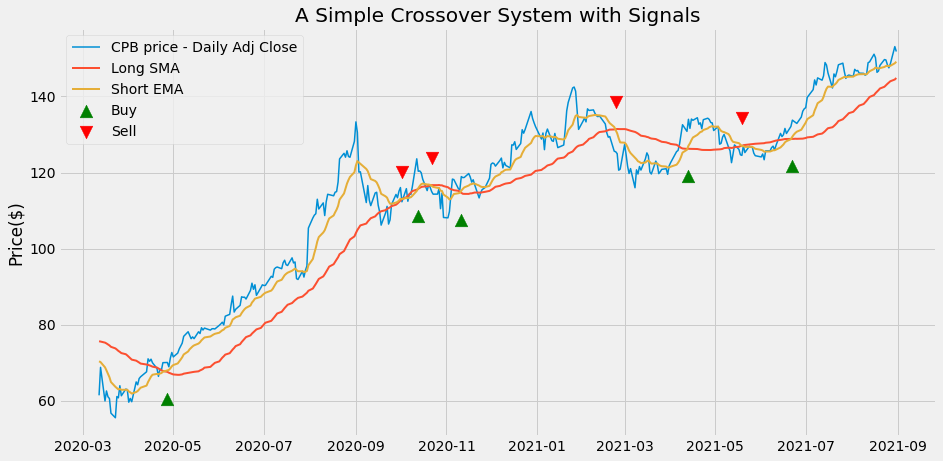

In [10]:
plot_system1_sig(df)

In [11]:
# The returns of the Buy and Hold strategy:
df['Hold'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
# The returns of the Moving Average strategy:
df['Strategy'] = df['Position'].shift(1) * df['Hold']
# We need to get rid of the NaN generated in the first row:
df.dropna(inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,sma50,ema14,Position,Hold,Strategy
Date,,,,,,,,,,,
2020-03-13,66.222504,69.980003,63.237499,69.492500,68.738045,370732000,75.530073,70.122766,0,0.113157,0.0
2020-03-16,60.487499,64.769997,60.000000,60.552502,59.895111,322423600,75.246046,68.758278,0,-0.137708,-0.0
2020-03-17,61.877499,64.402496,59.599998,63.215000,62.528702,324056000,75.029098,67.927246,0,0.043031,0.0
2020-03-18,59.942501,62.500000,59.279999,61.667500,60.998005,300233600,74.769843,67.002940,0,-0.024785,-0.0
2020-03-19,61.847500,63.209999,60.652500,61.195000,60.530632,271857200,74.508197,66.139636,0,-0.007692,-0.0


In [12]:
returns = np.exp(df[['Hold', 'Strategy']].sum()) - 1
print(f"Buy and hold return: {round(returns['Hold']*100,2)}%")
print(f"Strategy return: {round(returns['Strategy']*100,2)}%")

Buy and hold return: 147.35%
Strategy return: 70.51%
